Aqui está um código simples com sklearn para testar a execução de Python no Codespace com uma Decision Tree:

In [77]:
import numpy as np # linear algebra

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split    

from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

import seaborn as sns

In [65]:
# Carregar o dataset MNIST
digits = datasets.load_digits(n_class=10)

images=digits.images
targets=digits.target

#Mostra o Número
print(images[2])

[[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.]
 [ 0.  3. 13. 16. 16. 11.  5.  0.]
 [ 0.  0.  0.  3. 11. 16.  9.  0.]]


In [73]:
#Mostra o Número
print(targets[2])

images.shape
len(images)

2


1797

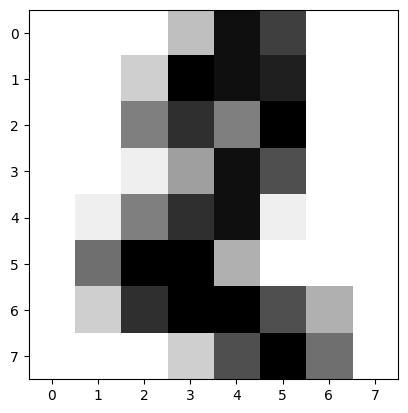

In [68]:
#Plota a imagem do número
plt.imshow(images[2],cmap='binary',interpolation='nearest')

In [76]:
images=images.reshape(len(images),8*8)

images.shape

print(images[2])

[ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
  8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
 15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
  5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]


In [62]:
X = digits.data
y = digits.target

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(images, targets, test_size=0.2)

modelo = XGBClassifier()
modelo.fit(X_train, y_train)

y_pred=modelo.predict(X_test)

acuracia = accuracy_score(y_test, y_pred)
print("Acurácia: %.2f%%" % (acuracia * 100.0))

Acurácia: 95.00%


In [63]:
confusion = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão\n')
print(confusion)

Matriz de Confusão

[[32  0  0  0  0  0  0  0  0  0]
 [ 0 35  1  1  0  0  0  0  1  0]
 [ 1  1 31  1  0  0  0  0  0  0]
 [ 0  1  0 35  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  1  0  0  0 30  0  0  0  1]
 [ 0  0  0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  3  0  2  0  0  0  0 37  1]
 [ 0  0  0  1  0  1  0  0  1 41]]


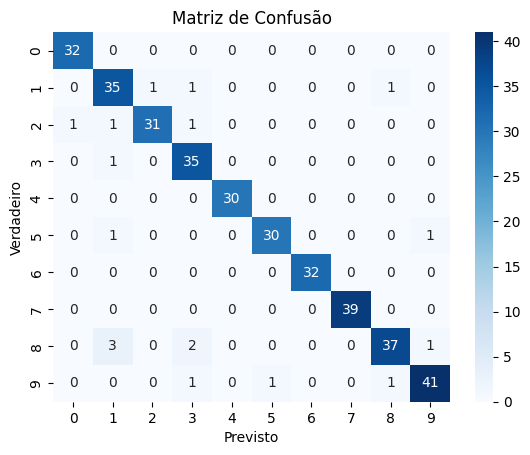

In [64]:
#Mostrar como heatmap
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão')
plt.show()